# **Proyecto final - Métodos computacionales**

## ***Simulación de colisión de galaxias***

**Estudiantes:**
- Laura Ruiz Arango
- Juliana Ruiz Montoya

- **Problema:** ¿Cómo es la interacción de dos galaxias que se mueven en la galaxia y en un futuro colapsarán?

- **Objetivo general:** Se desea analizar por medio de una simulación de choque de dos cuerpos la interacción de galaxias con condiciones iniciales.


La simulación de choque de galaxias es un problema fascinante en astrofísica y cosmología que nos permite comprender mejor la dinámica de las interacciones entre galaxias y estudiar los efectos de estas colisiones en la formación y evolución de las estructuras cósmicas. En este proyecto programacional, abordaremos este desafío simulando el choque de dos galaxias, para simplificar el problema, las galaxias estarán conformadas por un anillo de estrellas, cada una.


El objetivo principal de este proyecto es desarrollar una simulación numérica que nos permita estudiar el choque de dos galaxias anulares y analizar los efectos de la interacción entre ellas. Algunos objetivos específicos son:

- Generar galaxias anulares: Crear las configuraciones iniciales de las dos galaxias anulares que participarán en la colisión.

- Implementar la mecánica celeste: Desarrollar las ecuaciones de movimiento y la integración numérica necesaria para simular la dinámica de las estrellas dentro de las galaxias anulares. Esto incluye tener en cuenta la interacción gravitatoria entre las estrellas y las galaxias.

- Simular la colisión: Programar las interacciones entre las dos galaxias anulares y estudiar cómo evolucionan las propiedades físicas y geométricas durante el choque.
Esto podría involucrar el análisis de la formación de ondas de choque, la transferencia de momento y energía, y la redistribución de masa estelar, sin embargo, para el curso estas apreciaciones no las consideraremos.

- Visualización y análisis de resultados: Implementar herramientas de visualización para representar gráficamente la evolución de las galaxias y analizar los resultados de la simulación. Esto permitirá obtener información cuantitativa y cualitativa sobre el choque, como la forma final de las galaxias y la distribución de estrellas.

In [ ]:
#@title Librerías
import numpy as np
import matplotlib.pylab as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

- Se crea una función que simula galaxias anulares, con n estrellas y n anillos. Además, se considera una distribución de estrellas (puntos) no uniforme, para ser un poco más realistas a una situación real con respecto a la forma de las galaxias.

Text(0.5, 0, 'Z')

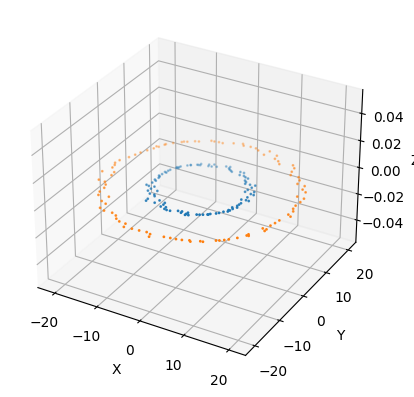

In [ ]:
def anillos_(r, n):

    " Input: la función recibe el el radio del anillo y el número de puntos, que equivale al número de estrellas"
    " Output: Genera un anillo con puntos distribuidos no uniformemente"

    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Se agregan perturbaciones a las coordenadas x e y, para generar una distribución no uniforme
    perturbacion = np.random.normal(0, 0.5, size=(n))
    x += perturbacion
    y += perturbacion

    z = np.zeros_like(x)
    return x, y, z

def crear_galaxia_(anillo, N):

    " Input: la función recibe el el radio del anillo y el número de puntos, que equivale al número de estrellas"
    " Output: Genera un anillo con puntos distribuidos no uniformemente"

    galaxia = []
    for i in range(anillo):
        r = (i + 1) * 10
        x, y, z = anillos_(r, N)
        galaxia.append((x, y, z))
    return galaxia

# Parámetros iniciales
n_anillos = 2  # Número de anillos en la galaxia
N = 100  # Número de puntos por anillo

# Generar la galaxia
galaxia_1 = crear_galaxia_(n_anillos, N)

# Visualizar la galaxia en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in galaxia_1:
    ax.scatter(i[0], i[1], i[2], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

La función `crear_galaxia(anillo, N)` utiliza la función `anillos(r, n)` para generar múltiples anillos de estrellas y construir así una galaxia completa. Esta función permite crear una estructura más compleja al combinar varios anillos en una sola entidad.

A continuación, se muestra un cambio en la función inicial para crear galaxias que permite generar varios anillos a una galaxia pero no deben estar centrados sus anillos

In [ ]:
def anillos(r, n, posicion):

    theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Se agregan perturbaciones a las coordenadas x e y, para generar una distribución no uniforme
    perturbacion = np.random.normal(0, 0.5, size=(n))
    x += perturbacion
    y += perturbacion

    z = np.zeros_like(x)
    return x, y, z

def crear_galaxia(n_anillos, N, posicion):

    galaxia = []
    for i in range(n_anillos):
        r = (i + 1) * 10
        initial_position = i * posicion  # Se ajusta la posición de los demás anillos
        x, y, z = anillos(r, N, initial_position)
        galaxia.append((x, y, z))
    return galaxia

Text(0.5, 0, 'Z')

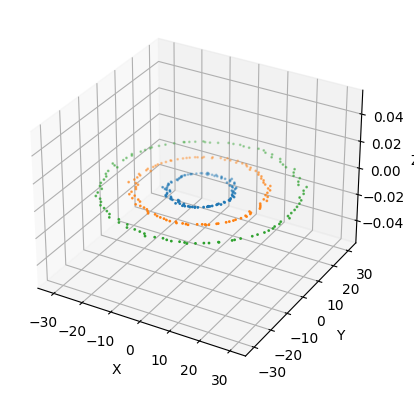

In [ ]:
# Parámetros iniciales
n_anillos = 3
N = 100

galaxia_1 = crear_galaxia(n_anillos, N, 1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in galaxia_1:
    ax.scatter(i[0], i[1], i[2], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

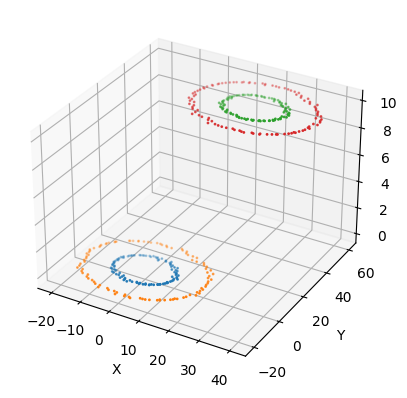

In [ ]:
''' Ahora, se crean dos galaxias con dos anillos centrados para cada una '''

# Parámetros iniciales
n_anillos = 2
N = 100

# Se generan las dos galaxias
galaxia_1 = crear_galaxia(n_anillos, N, 1)
galaxia_2 = crear_galaxia(n_anillos, N, 1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Iterar sobre los anillos de la primera galaxia
for i in galaxia_1:
    ax.scatter(i[0], i[1], i[2], s=1)

# Aplicar una traslación a las coordenadas de la segunda galaxia
traslacion = np.array([20, 40, 10])
for i in galaxia_2:
    ax.scatter(i[0] + traslacion[0], i[1] + traslacion[1], i[2] + traslacion[2], s=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

- Se establecen las funciones de movimiento de las galaxias, ambas funciones utilizan la Ley de Gravitación Universal para calcular la aceleración experimentada por cada galaxia debido a la influencia gravitacional de la otra galaxia; y devuelven el valor de la aceleración experimentada por cada galaxia en las direcciones x, y, z. La ecuación de movimiento es:

Ecuación de movimiento para la galaxia 1:

\begin{equation}
\ddot{{\mathbf{{r}}}}_1(t) = -\frac{{G \cdot m_2 \cdot (\mathbf{{r}}_1 - \mathbf{{r}}_2)}}{{\|\mathbf{{r}}_1 - \mathbf{{r}}_2\|^3}}
\end{equation}

Ecuación de movimiento para la galaxia 2:

\begin{equation}
\ddot{{\mathbf{{r}}}}_2(t) = -\frac{{G \cdot m_1 \cdot (\mathbf{{r}}_2 - \mathbf{{r}}_1)}}{{\|\mathbf{{r}}_2 - \mathbf{{r}}_1\|^3}}
\end{equation}

Donde:
- $\ddot{{\mathbf{{r}}}}_1(t)$ y $\ddot{{\mathbf{{r}}}}_2(t)$ son las aceleraciones de la galaxia 1 y la galaxia 2, respectivamente.
- $G$ es la constante de gravitación universal.
- $m_1$ y $m_2$ son las masas de la galaxia 1 y la galaxia 2, respectivamente.
- $\mathbf{{r}}_1$ y $\mathbf{{r}}_2$ son los vectores de posición de la galaxia 1 y la galaxia 2, respectivamente.
- $\|\mathbf{{r}}_1 - \mathbf{{r}}_2\|$ es la distancia euclidiana entre las dos galaxias.


In [ ]:
''' Funciones de movimiento de las galaxias '''

def movimiento_galaxia1(t, x, y, z):
    G = 6.67430e-11  # Constante de gravitación universal
    m2 = 1e12  # Masa de la galaxia 2
    x2 = galaxia2_x[-1]  # Posición en x de la galaxia 2 en el tiempo actual
    y2 = galaxia2_y[-1]  # Posición en y de la galaxia 2 en el tiempo actual
    z2 = galaxia2_z[-1]  # Posición en z de la galaxia 2 en el tiempo actual
    return -G * m2 * (x - x2) / np.sqrt((x - x2)**2 + (y - y2)**2 + (z - z2)**2)**3

def movimiento_galaxia2(t, x, y, z):
    G = 6.67430e-11
    m1 = 1e12  # Masa de la galaxia 1
    x1 = galaxia1_x[-1]  # Posición en x de la galaxia 1 en el tiempo actual
    y1 = galaxia1_y[-1]  # Posición en y de la galaxia 1 en el tiempo actual
    z1 = galaxia1_z[-1]  # Posición en z de la galaxia 1 en el tiempo actual
    return -G * m1 * (x - x1) / np.sqrt((x - x1)**2 + (y - y1)**2 + (z - z1)**2)**3

Además, se crea una función que calcula el movimiento de las estrellas en función de las posiciones actuales de las estrellas y la galaxia, y la masa de la galaxia.

La función utiliza la Ley de Gravitación Universal para calcular la aceleración experimentada por cada estrella debido a la influencia gravitacional de la galaxia.

La función es útil para calcular la aceleración de las estrellas en función de la posición de la galaxia y la masa de la misma, lo cual permite actualizar las velocidades y posiciones de las estrellas en cada paso de la simulación.

In [ ]:
''' Función de movimiento de las estrellas '''

def movimiento_estrellas(t, x, y, z, x_galaxia, y_galaxia, z_galaxia, m_galaxia):
    G = 6.67430e-11  # Constante de gravitación universal
    return -G * m_galaxia * (x - x_galaxia) / np.sqrt((x - x_galaxia)**2 + (y - y_galaxia)**2 + (z - z_galaxia)**2)**3

Con las funciones de movimiento establecidad, se puede ver que necesitamos resolver un **sistema de ecuaciones difernciales** en tres dimensiones, para esto utizamos el método de **Runge - Kutta de orden 4**.

De esta manera, podemos calcular las nuevas posiciones y velocidades de las galaxias y las estrellas en cada paso de tiempo. Esto implica aplicar iterativamente el método de R-K para avanzar en el tiempo y actualizar las coordenadas y velocidades de las partículas.

In [ ]:
# Función que implementa el método de Runge-Kutta de orden cuarto orden

def runge_kutta4(t, x, y, z, h, f, *args):
    k1 = h * f(t, x, y, z, *args)
    k2 = h * f(t + 0.5 * h, x + 0.5 * k1, y + 0.5 * k1, z + 0.5 * k1, *args)
    k3 = h * f(t + 0.5 * h, x + 0.5 * k2, y + 0.5 * k2, z + 0.5 * k2, *args)
    k4 = h * f(t + h, x + k3, y + k3, z + k3, *args)
    return x + (1/6) * (k1 + 2*k2 + 2*k3 + k4)

In [ ]:
# Parámetros iniciales
t = 0
t_fin = 10
h = 0.01

# Arreglos para almacenar las posiciones de las galaxias y las estrellas
galaxia1_x = []
galaxia1_y = []
galaxia1_z = []
galaxia2_x = []
galaxia2_y = []
galaxia2_z = []
estrellas_x = []
estrellas_y = []
estrellas_z = []

In [ ]:
# Condiciones iniciales de las galaxias
r = 1
theta = np.linspace(0, 2*np.pi,)
galaxia1_x.append(1.0)
galaxia1_y.append(0.0)
galaxia1_z.append(0.0)
galaxia2_x.append(-1.0)
galaxia2_y.append(0.0)
galaxia2_z.append(0.0)

# Condiciones iniciales de las estrellas alrededor de la galaxia 1
for _ in range(100):
    estrellas_x.append(1.0 + np.random.uniform(-0.1, 0.1))
    estrellas_y.append(np.random.uniform(-0.1, 0.1))
    estrellas_z.append(np.random.uniform(-0.1, 0.1))

# Condiciones iniciales de las estrellas alrededor de la galaxia 2
for _ in range(100):
    estrellas_x.append(-1.0 + np.random.uniform(-0.1, 0.1))
    estrellas_y.append(np.random.uniform(-0.1, 0.1))
    estrellas_z.append(np.random.uniform(-0.1, 0.1))

Tenemos parámetros iniciales y los arreglos que se utilizarán en la simulación de colisión de galaxias:

- $t$: tiempo inicial de la simulación.
- $t_{fin}$: tiempo final de la simulación.
- $h$: tamaño del paso de integración.
- $r$: radio de los anillos de las galaxias.
- $θ$: arreglo de ángulos que se utilizará para distribuir las estrellas alrededor de las galaxias.
- `galaxia1_x, galaxia1_y, galaxia1_z:` coordenadas x, y y z de la galaxia 1 en el tiempo inicial. En este caso, la galaxia 1 se encuentra en la posición (1.0, 0.0, 0.0).
- `galaxia2_x, galaxia2_y, galaxia2_z:` coordenadas x, y y z de la galaxia 2 en el tiempo inicial. En este caso, la galaxia 2 se encuentra en la posición (-1.0, 0.0, 0.0).
- `estrellas_x, estrellas_y, estrellas_z:` arreglos que almacenan las coordenadas x, y y z de las estrellas alrededor de las galaxias. Se generan 100 estrellas alrededor de cada galaxia. Las coordenadas se generan aleatoriamente dentro de un rango pequeño alrededor de las posiciones de las galaxias.

**Nota:** Todos estos valores no son reales, solo nos aportan datos para hacer la simulación posible, sin embargo, están adecuados para ser modificados.

In [ ]:
''' Simulación del choque entre las galaxias '''

while t <= t_fin:
    # Actualizar las posiciones de las galaxias utilizando Runge-Kutta
    galaxia1_x.append(runge_kutta4(t, galaxia1_x[-1], galaxia1_y[-1], galaxia1_z[-1], h, movimiento_galaxia1))
    galaxia1_y.append(runge_kutta4(t, galaxia1_y[-1], galaxia1_x[-1], galaxia1_z[-1], h, movimiento_galaxia1))
    galaxia1_z.append(runge_kutta4(t, galaxia1_z[-1], galaxia1_x[-1], galaxia1_y[-1], h, movimiento_galaxia1))
    galaxia2_x.append(runge_kutta4(t, galaxia2_x[-1], galaxia2_y[-1], galaxia2_z[-1], h, movimiento_galaxia2))
    galaxia2_y.append(runge_kutta4(t, galaxia2_y[-1], galaxia2_x[-1], galaxia2_z[-1], h, movimiento_galaxia2))
    galaxia2_z.append(runge_kutta4(t, galaxia2_z[-1], galaxia2_x[-1], galaxia2_y[-1], h, movimiento_galaxia2))

    # Actualizar las posiciones de las estrellas utilizando Runge-Kutta
    for i in range(len(estrellas_x)):
        estrellas_x[i] = runge_kutta4(t, estrellas_x[i], estrellas_y[i], estrellas_z[i], h, movimiento_estrellas, galaxia1_x[-1], galaxia1_y[-1], galaxia1_z[-1], 1e10)
        estrellas_y[i] = runge_kutta4(t, estrellas_y[i], estrellas_x[i], estrellas_z[i], h, movimiento_estrellas, galaxia1_x[-1], galaxia1_y[-1], galaxia1_z[-1], 1e10)
        estrellas_z[i] = runge_kutta4(t, estrellas_z[i], estrellas_x[i], estrellas_y[i], h, movimiento_estrellas, galaxia1_x[-1], galaxia1_y[-1], galaxia1_z[-1], 1e10)
        estrellas_x[i] = runge_kutta4(t, estrellas_x[i], estrellas_y[i], estrellas_z[i], h, movimiento_estrellas, galaxia2_x[-1], galaxia2_y[-1], galaxia2_z[-1], 1e10)
        estrellas_y[i] = runge_kutta4(t, estrellas_y[i], estrellas_x[i], estrellas_z[i], h, movimiento_estrellas, galaxia2_x[-1], galaxia2_y[-1], galaxia2_z[-1], 1e10)
        estrellas_z[i] = runge_kutta4(t, estrellas_z[i], estrellas_x[i], estrellas_y[i], h, movimiento_estrellas, galaxia2_x[-1], galaxia2_y[-1], galaxia2_z[-1], 1e10)

    t += h

Esta simulación de choque de galaxias inicia un bucle while que se ejecuta mientras `t` sea menor o igual a `t_fin`.

Dentro del bucle, se actualizan las posiciones de las galaxias utilizando el método de Runge-Kutta de orden cuarto y las funciones de movimiento `movimiento_galaxia1` y `movimiento_galaxia2`.

Luego, se actualizan las posiciones de las estrellas utilizando el método de Runge-Kutta de orden cuarto y la función de movimiento `movimiento_estrellas`, pasando las coordenadas de las galaxias correspondientes como argumentos adicionales.

Finalmente, se incrementa el tiempo `t` en `h` y el bucle se repite hasta que se alcance el tiempo final `t_fin`.

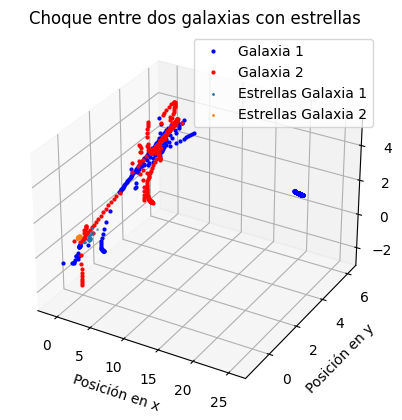

In [ ]:
# Visualización de las trayectorias

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(galaxia1_x, galaxia1_y, galaxia1_z, 'bo', markersize=2, label='Galaxia 1')
ax.plot(galaxia2_x, galaxia2_y, galaxia2_z, 'ro', markersize=2, label='Galaxia 2')
ax.scatter(estrellas_x[:100], estrellas_y[:100], estrellas_z[:100], s=1, label='Estrellas Galaxia 1')
ax.scatter(estrellas_x[100:], estrellas_y[100:], estrellas_z[100:], s=1, label='Estrellas Galaxia 2')
ax.set_xlabel('Posición en x')
ax.set_ylabel('Posición en y')
ax.set_zlabel('Posición en z')
ax.legend()
plt.title('Choque entre dos galaxias con estrellas')
plt.show()

En la visualización, se trazan las posiciones de las estrellas alrededor de las galaxias utilizando la función scatter. Las primeras 100 estrellas corresponden a las estrellas alrededor de la galaxia 1 y se representan como puntos pequeños. Las siguientes 100 estrellas corresponden a las estrellas alrededor de la galaxia 2 y también se representan como puntos pequeños.

En el gráfico se puede observar la trayectoria de las galaxias y la nueva distribución de estrellas, causada por la colisión de los dos cuerpos. Esta interacción es de dos cuerpos, sin embargo, cada cuerpo tiene n estrellas.

## **Intento 2 - Simulación de galaxias**

In [ ]:
# Funciones de movimiento de las galaxias
def movimiento_galaxia1(t, x, y, z):
    G = 6.67430e-11  # Constante de gravitación universal
    m2 = 1e12  # Masa de la galaxia 2
    x2 = galaxia2_x[-1]  # Posición en x de la galaxia 2 en el tiempo actual
    y2 = galaxia2_y[-1]  # Posición en y de la galaxia 2 en el tiempo actual
    z2 = galaxia2_z[-1]  # Posición en z de la galaxia 2 en el tiempo actual
    return -G * m2 * (x - x2) / np.sqrt((x - x2)**2 + (y - y2)**2 + (z - z2)**2)**3

def movimiento_galaxia2(t, x, y, z):
    G = 6.67430e-11  # Constante de gravitación universal
    m1 = 1e12  # Masa de la galaxia 1
    x1 = galaxia1_x[-1]  # Posición en x de la galaxia 1 en el tiempo actual
    y1 = galaxia1_y[-1]  # Posición en y de la galaxia 1 en el tiempo actual
    z1 = galaxia1_z[-1]  # Posición en z de la galaxia 1 en el tiempo actual
    return -G * m1 * (x - x1) / np.sqrt((x - x1)**2 + (y - y1)**2 + (z - z1)**2)**3

# Funciones de movimiento de las estrellas
def movimiento_estrellas(t, x, y, z, x_galaxia, y_galaxia, z_galaxia, m_galaxia):
    G = 6.67430e-11  # Constante de gravitación universal
    return -G * m_galaxia * (x - x_galaxia) / np.sqrt((x - x_galaxia)**2 + (y - y_galaxia)**2 + (z - z_galaxia)**2)**3

In [ ]:
# Función que implementa el método de Runge-Kutta de cuarto orden en 3D
def runge_kutta4(t, x, y, z, h, f, *args):
    k1 = h * f(t, x, y, z, *args)
    k2 = h * f(t + 0.5 * h, x + 0.5 * k1, y + 0.5 * k1, z + 0.5 * k1, *args)
    k3 = h * f(t + 0.5 * h, x + 0.5 * k2, y + 0.5 * k2, z + 0.5 * k2, *args)
    k4 = h * f(t + h, x + k3, y + k3, z + k3, *args)
    return x + (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [ ]:
# Condiciones iniciales de las galaxias
galaxia1_x = [10]
galaxia1_y = [0]
galaxia1_z = [0]
galaxia2_x = [20]
galaxia2_y = [0]
galaxia2_z = [0]

# Condiciones iniciales de las estrellas alrededor de las galaxias
n_estrellas = 100
radio_estrellas = 0.5

In [ ]:
theta = np.linspace(0, 2*np.pi, n_estrellas)
x_estrellas_galaxia1 = galaxia1_x[-1] + radio_estrellas * np.cos(theta)
y_estrellas_galaxia1 = galaxia1_y[-1] + radio_estrellas * np.sin(theta)
z_estrellas_galaxia1 = galaxia1_z[-1] + np.zeros(n_estrellas)

x_estrellas_galaxia2 = galaxia2_x[-1] + radio_estrellas * np.cos(theta)
y_estrellas_galaxia2 = galaxia2_y[-1] + radio_estrellas * np.sin(theta)
z_estrellas_galaxia2 = galaxia2_z[-1] + np.zeros(n_estrellas)

Hasta el momento, todo se ha planteado como en el intento 1 de la simulación, ahora lo que se desea es tener un solo array de datos para cada coordenada de las estrellas, según las dos galaxias.

In [ ]:
# Se unen los arrays de las coordenadas de las estrellas alrededor de las galaxias
estrellas_x = np.concatenate([x_estrellas_galaxia1, x_estrellas_galaxia2])
estrellas_y = np.concatenate([y_estrellas_galaxia1, y_estrellas_galaxia2])
estrellas_z = np.concatenate([z_estrellas_galaxia1, z_estrellas_galaxia2])

# Masa de las galaxias y las estrellas (datos aleatorios)
m_galaxia1 = 1e12
m_galaxia2 = 1e12
m_estrellas = 1e8

# Parámetros de simulación
t_total = 10  # Tiempo total de simulación
n_steps = 1000  # Número de pasos de simulación
h = t_total / n_steps  # Tamaño del paso de simulación

In [ ]:
# Simulación
for step in range(n_steps):
    t = step * h

    # Movimiento de las galaxias
    galaxia1_x.append(runge_kutta4(t, galaxia1_x[-1], galaxia1_y[-1], galaxia1_z[-1], h, movimiento_galaxia1))
    galaxia1_y.append(runge_kutta4(t, galaxia1_y[-1], galaxia1_x[-1], galaxia1_z[-1], h, movimiento_galaxia1))
    galaxia1_z.append(runge_kutta4(t, galaxia1_z[-1], galaxia1_x[-1], galaxia1_y[-1], h, movimiento_galaxia1))

    galaxia2_x.append(runge_kutta4(t, galaxia2_x[-1], galaxia2_y[-1], galaxia2_z[-1], h, movimiento_galaxia2))
    galaxia2_y.append(runge_kutta4(t, galaxia2_y[-1], galaxia2_x[-1], galaxia2_z[-1], h, movimiento_galaxia2))
    galaxia2_z.append(runge_kutta4(t, galaxia2_z[-1], galaxia2_x[-1], galaxia2_y[-1], h, movimiento_galaxia2))

    # Movimiento de las estrellas
    estrellas_x = runge_kutta4(t, estrellas_x, estrellas_y, estrellas_z, h, movimiento_estrellas, galaxia1_x[-1], galaxia1_y[-1], galaxia1_z[-1], m_galaxia1)
    estrellas_y = runge_kutta4(t, estrellas_y, estrellas_x, estrellas_z, h, movimiento_estrellas, galaxia1_x[-1], galaxia1_y[-1], galaxia1_z[-1], m_galaxia1)
    estrellas_z = runge_kutta4(t, estrellas_z, estrellas_x, estrellas_y, h, movimiento_estrellas, galaxia1_x[-1], galaxia1_y[-1], galaxia1_z[-1], m_galaxia1)

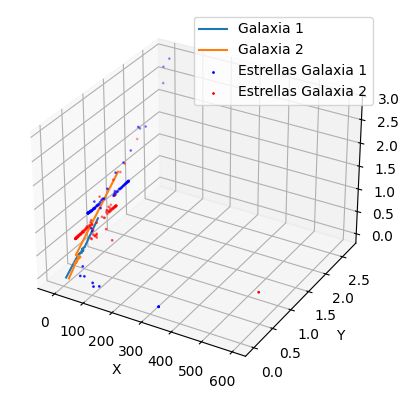

In [ ]:
# Visualización en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(galaxia1_x, galaxia1_y, galaxia1_z, label='Galaxia 1')
ax.plot(galaxia2_x, galaxia2_y, galaxia2_z, label='Galaxia 2')
ax.scatter(estrellas_x[:n_estrellas], estrellas_y[:n_estrellas], estrellas_z[:n_estrellas], color='blue', s=1, label='Estrellas Galaxia 1')
ax.scatter(estrellas_x[n_estrellas:], estrellas_y[n_estrellas:], estrellas_z[n_estrellas:], color='red', s=1, label='Estrellas Galaxia 2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

# **Conclusiones**

- Con los resultados de la sismulaciones que obtuvimos nos damos que cuenta que la interaccióoon entre dos galaxias es muy fuerte cuando la distancia entre ellas es pequeña por lo que antes del choque y durante el choque la configuración inicial de las posiciones se cambia drasticamente y esto dependera totalmente de las condiciones iniciales, las velocidades y las aceleraciones de cada cuerpo por eso es muy utili utilizar el metodo de Rugen Kutta debido a que este metodo nos ayuda mucho a relacionar todas estas variables y hacer una evolución temporal, tambien el paso que le damos a este metodo ayuda a que la evolución temporal sea concorde a la interacción de los cuerpos; comparandolo con otro metodo de solución de las ecuaciones diferenciales de movmiento como el de Euler, este metodo no es muy util debido a que la evolución temporal que necesitamos para el choque no se da si no que este metodo determina una solucion final con un paso muy irregular por lo que va converger mas rapido a la solucion final que el metodo de Rugen Kutta por eso este metodo es el adecuado para solucionar este tipo de ecuaciones con ciertas interacciones.



- Es muy importante como se almacenan las soluciones de las ecuaciones de movimiento debido a que si solo aplicamos una vez el metodo de Rugen Kutta este solo nos dara una solución segun el tiempo y el paso que le demos y solo obtenderemos una posicion en la evolución temporal por esto debemos tener un ciclo donde se involucre la evolución temporal para poder almacenar y aplicar la solucion de las ecuaciones de manera correcta para asi poder ver el minimo cambio en las posiciones de cada cuerpo.